In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the data file
df=pd.read_csv('train.csv')

In [3]:
# get the title of the variables
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

In [5]:
# get the null value totals
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<AxesSubplot:>

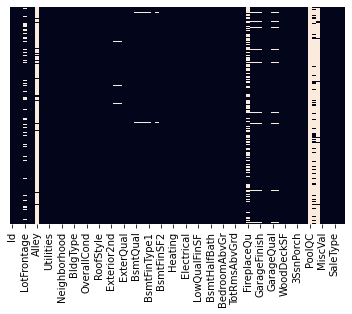

In [6]:
# mapping to see the null values
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [7]:
df.shape

(1460, 81)

In [8]:
# lets try to fill in missing values and drop some values
# df['MSZoning'].value_counts() helps in choosing mode or mean for data type
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [9]:
df.drop(['Alley'],axis=1,inplace=True)

In [10]:
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

In [11]:
df['FireplaceQu']=df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])

In [12]:
df.drop(['GarageYrBlt'],axis=1,inplace=True)

In [13]:
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [14]:
df.drop(['PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [15]:
df.drop(['Id'],axis=1,inplace=True)

In [16]:
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

In [17]:
df['BsmtExposure']=df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

In [18]:
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

In [19]:
# check if no null values to proceed
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

<AxesSubplot:>

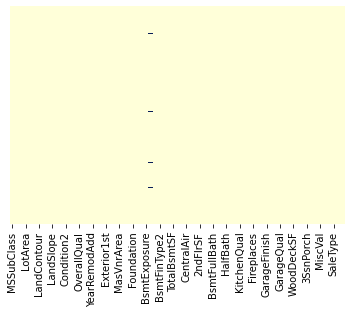

In [20]:
# checking the change in the map
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [21]:
df.dropna(inplace=True)

In [22]:
df.shape

(1422, 75)

In [23]:
# Handle Categorical Features
cols=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [24]:
len(cols)

39

In [25]:
# functions to handle all the feature and converting them into categories 
def category_multcols(mulcolumns):
    df_final=final_df
    i=0
    for fields in mulcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [26]:
#copying the data set
main_df=df.copy()

In [27]:
# Combine Test Data 
test_df=pd.read_csv('learning.csv')

In [28]:
test_df.shape

(1459, 74)

In [29]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [30]:
# combining columns
final_df=pd.concat([df,test_df],axis=0)

In [31]:
# checking sale price through column 
final_df['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454         NaN
1455         NaN
1456         NaN
1457         NaN
1458         NaN
Name: SalePrice, Length: 2881, dtype: float64

In [32]:
final_df.shape

(2881, 75)

In [33]:
#getting all the columns 
final_df=category_multcols(cols)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [34]:
final_df.shape

(2881, 235)

In [35]:
# removing duplicate values
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [36]:
final_df.shape

(2881, 175)

In [37]:
final_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,1,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,1,0,0,0,0,1,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,1,1,0,0,0,0,0,0
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,1,0,0,0,1,0,0,0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,1,0,0,0,0,1,0,0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,1,1,0,0,0,0,0,0


In [38]:
# divde the dataa sets training and test 
df_Train=final_df.iloc[:1422,:]
df_Test=final_df.iloc[1422:,:]

In [39]:
df_Train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,1,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,1,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,1,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,1,0,0,0,0,1,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [40]:
df_Test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,1,1,0,0,0,0,0,0
1,20,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,1,1,0,0,0,0,0,0
2,60,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,1,1,0,0,0,0,0,0
3,60,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,1,1,0,0,0,0,0,0
4,120,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,1,1,0,0,0,0,1,0


In [41]:
# removing all sale price for test as its null
df_Test.drop(['SalePrice'],axis=1,inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_5000\131063470.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Test.drop(['SalePrice'],axis=1,inplace=True)


In [42]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

In [43]:
def CostFunction(x,y,m,theta):
 cost = np.sum((((x.dot(m) + theta) - y) ** 2) / (2*len(y)))
 return cost

In [44]:
def GradientDescent(x, y, m, theta, learning_rate, epochs):
 cost_list = [0] * epochs
 
 for epoch in range(epochs):
     z = x.dot(m) + theta
     loss = z - y
 
 m_gradient = x.T.dot(loss) / len(y)
 theta_gradient = np.sum(loss) / len(y)
 
 m = m - learning_rate*m_gradient
 theta = theta - learning_rate*theta_gradient
 
 cost = CostFunction(x, y, m, theta)
 cost_list[epoch] = cost
 
 return m, theta, cost_list


In [100]:
m, theta, c= GradientDescent(X_train, y_train, np.zeros(X_train.shape[1]),0,0.00000002,epochs=15000)

In [101]:
def predict(X, m, theta):
 return X.dot(m) + theta


In [102]:
y_pred = predict(df_Test, m, theta)

In [103]:
y_pred

0       557397.737845
1       679474.450071
2       658229.462556
3       493214.887163
4       281226.519595
            ...      
1454    139948.409403
1455    138631.240640
1456    922031.161828
1457    507250.364131
1458    482078.816692
Length: 1459, dtype: float64

In [104]:
#Create Sample Submission file
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)